# Master IASD app - Dauphine PSL

# Introduction to Convolutional Neural Network and Image classification

Dans ce notebook, vous allez apprendre à implémenter des **réseaux de neurones convolutifs** en PyTorch. </br>

Ce notebook est divisé en deux parties
- La première partie permet à la fois d'**illustrer les couches de convolution et de pooling** mais également de découvrir leur **implémentation en PyTorch**
- Dans la deuxième partie, vous allez implémentez et entraîner des **Convolutonal Neural Networks (CNNs)** en PyTorch


# Partie 1 - Convolutional Layers, Max Pooling Layer, Average Pooling Layers

Dans cette première partie, nous allons nous familiariser avec les notions suivantes :
- **couches de convolution**
- **couches de pooling**

L'objectif de cette partie est de **comprendre le fonctionnement de ces opérateurs** et de **visualiser leurs outputs**.

---

Commençons par importer une image. </br>
Executez la cellule suivante pour importer une image et la preprocesser en tenseur. </br>
⚠️ Il est important de noter plusieurs choses ici
- lors du **preprocessing**, on effectue l'opération suivant `mon_image/255.`, cela permet de normaliser l'image entre 0 et 1.
- la dimension des images : lors du passage de `np.ndarray` à `torch.tensor`, les dimensions changent : **les image sous forme d'array NumPy** ont une dimensions $l \times L \times C$ tandis que **sous forme de tenseur** la dimension est $C \times l \times L$ (avec $l$ la longueur, $L$ la largeur et $C$ le nombre de channels de l'image).
- enfin lorsque l'on utilise des images sous forme de tensur, il est souvent commode d'ajouter une dimension au début, comme si on manipulait un batch d'image : $B \times C \times l \times L$ (avec $B$ le nombre d'image du batch).

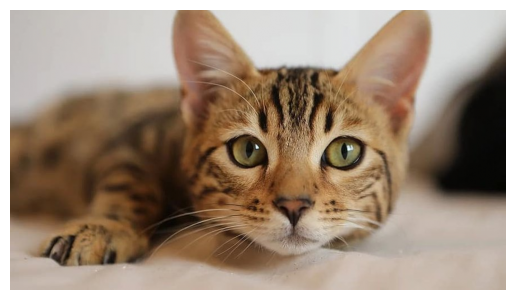

Shape de l'array : (500, 885, 3)
Shape du tenseur : torch.Size([1, 3, 500, 885])


In [20]:
from PIL import Image
import torch
import torchvision

import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default')
plt.rc('text', usetex=True)
plt.rc('font', family='sans-serif')
plt.rc('font', size=14)
plt.rc('axes', titlesize=14)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=14)
plt.rc('lines', markersize=10)

!wget --quiet https://images.ladepeche.fr/api/v1/images/view/5f2e82a43e45462ace045b04/large/image.jpg

# Lecture de l'image en numpy array
x = np.asarray(Image.open('image.jpg')) / 255.0

# Visualisation de l'image
plt.imshow(x)
plt.axis("off")
plt.show()

# Afficher les dimensions de l'image
print("Shape de l'array : " + str(x.shape))

# Conversion de l'array en tenseur
x = torch.from_numpy(x).permute(2, 0, 1).float()

# On rajoute une dimension au tenseur pour avoir la dimension d'un batch (b x c x l x L)
x = x.unsqueeze(0)
print("Shape du tenseur : " + str(x.shape))

On note bien ici que la différence de dimensionnement entre l'`array NumPy` et le `tensur PyTorch`. </br>
📚 **Rappel de cours** : ici on remarque qu'il y a 3 channels dans l'image. Les images couleurs ont en général **3 chanels : rouge, vert et bleu** (on parle de format RGB ou RVB en français).

## 1.1. Convolutions

### [`torch.nn.Conv2d`](https://pytorch.org/docs/stable/nn.html#torch.nn.Conv2d)

Dans cette section, vous allez manipuler les **couches de convolutions**. </br>
Pour implémenter une couche de convolution en Pytorch, on utilise l'opérateur [`torch.nn.Conv2d`](https://pytorch.org/docs/stable/nn.html#torch.nn.Conv2d). On parle de convolution 2D car ici on manipule des images, c'est à dire, des à deux dimensions (longueur et largeur). Il existe égelement des convolutions 1D et des convolutions 3D (pour les volumes par exemple). </br>

L'opérateur [`torch.nn.Conv2d`](https://pytorch.org/docs/stable/nn.html#torch.nn.Conv2d) prend plusieurs arguments en entrée
- `in_channels` : le **nombre de channels en entrée**
- `out_channels` : le **nombre de channels en sortie**, générés par la convolution
- `kernel_size` : la taille du **noyau de convolution**
- `stride` : le paramètre de stride (déplacement du noyau)
- `padding` : le paramètre de padding de l'image, nombre de pixels de padding

On rappelle la **formule de la convolution**, qui permet d'obtenir la **dimension des features maps** en sortie de la convolution
$$output = \frac{input - K + 2P}{S} + 1$$
où $K$ correspond à la dimension du noyau de convolution, $P$ le paramètre de padding et $S$ le paramètre de stride.


---

Dans la cellule suivante, nous allons initialiser une couche de convolution avec les paramètres suivants
- 3 channels en entrée
- 10 channels en sortie
- taille du noyau convolutif : $5\times 5$
- paramètre de stride : 1
- padding : 0

📚 **Rappel de cours** : En terme de paramètres, la convolution que nous allons créer contient 10 filtres de dimension $5 \times 5 \times 3$ dont les coefficient sont initialisés de façon aléatoire.

In [21]:
conv = torch.nn.Conv2d(3, 10, kernel_size=5, stride=1, padding=0, bias=False)
# Afficher la dimension des poids
print(conv.weight.size())

torch.Size([10, 3, 5, 5])


**Remarque:** vous pouvez remarquer que l'argument `bias` de la fonction `torch.nn.Conv2d` est initialisé à `False`. Il est possible d'initialiser la fonction avec un vecteur de biais a ajouter à l'output de chaque filtre.

Vous pouvez également remarquer que `conv.weight` a bien 4 dimensions, 10 filtres de dimensions $5 \times 5\times 3$. </br>

Maintenant que nous avons crééer cette convolution, appliquons la à l'image import et visualisons les résultats.

In [22]:
# On applique la convolution
y = conv(x)
# Observez la dimensions des inputs/outputs
print(x.size())
print(y.size())

torch.Size([1, 3, 500, 885])
torch.Size([1, 10, 496, 881])


Vérifions que les dimensions des feature maps en sortie de la convolution concordent avec la formule de la convoltion énoncée plus haut
$$output = \frac{input - K + 2P}{S} + 1$$ </br>
On obtient d'une part $\frac{885 - 5 + 2 \times 0}{1} + 1 = 881$, puis $\frac{500 - 5 + 2 \times 0}{1} + 1 = 496$. Donc les dimensions sont respecter.


La variable `y` contient le resultat de l'opération de convolution.
Visualisons maintenant le résultat `y` de la convolution. Pour cela, nous utilisons `torchvision.utils.make_grid`, afin d'aficher une image pour chaque feature map de `y`. </br>
Executez la cellule suivante pour découvrir le résultat de la convolution

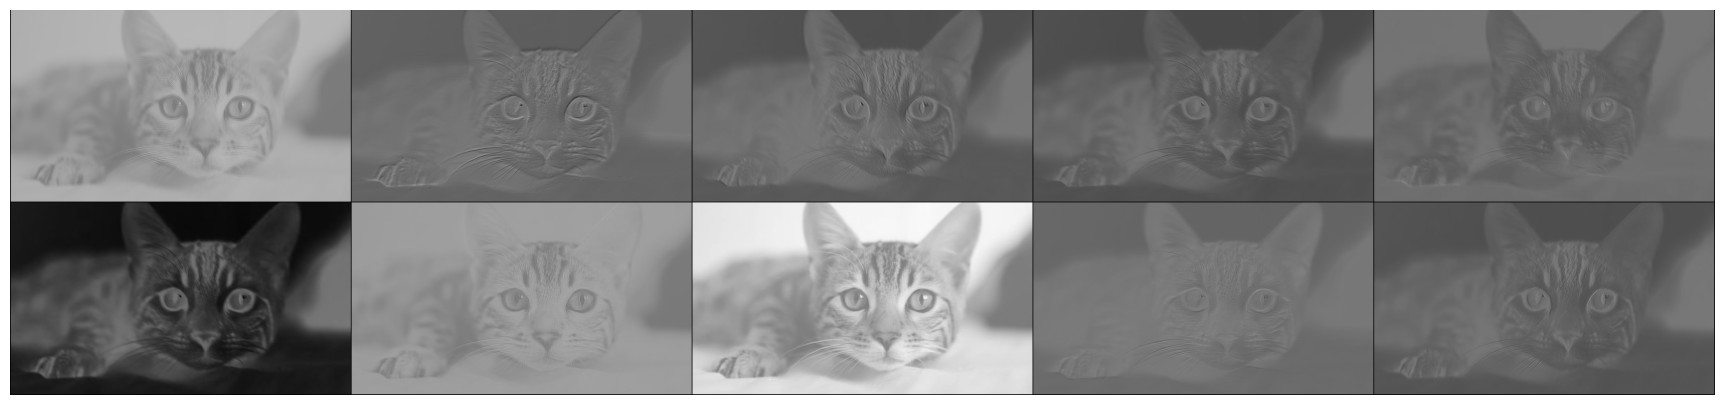

In [23]:
# Visualisation des ouputs de y
def vis_features(y, figsize=(22, 20)):
    # Redimensionnement du tenseurs
    out = y.permute(1, 0, 2, 3)
    # Normalisation entre 0 et 1
    out = (out - out.min().expand(out.size())) / (out.max() - out.min()).expand(out.size())
    # Creation d'une grille d'images
    out = torchvision.utils.make_grid(out, nrow=5)
    # Conversion en numpy array
    out = np.transpose(out.detach().numpy(), (1, 2, 0))
    # affichage
    plt.figure(figsize=figsize)
    plt.imshow(out)
    plt.gca().grid(False)
    plt.axis("off")


vis_features(y)

Ainsi on peut visualiser les 10 features maps créées par la convolution.

### `torch.nn.Conv2d` - le **stride**

Dans l'exemple précédent, le filtre convolutif que nous avons utilisé **préservent la resolution de l'image**. Cependant, il peut être utile de **réduire la dimension de l'output**. Pour cela, on peut utiliser le paramètre `stride` de la fonction `torch.nn.Conv2d`. On parle de **downsampling**.

🛠 **EXERCICE :** Complétez la fonction cellule ci-dessous et implémentez la même convolution que précédemment, mais avec un paramètre `stride=16`. Ensuite, apppliquez la convolution à l'image initiale `x`.




In [24]:
### CODEZ ICI : Remplacez les None par votre code ###
conv_downsampling = torch.nn.Conv2d(3, 10, kernel_size=5, stride=16, padding=0, bias=False)
y_downsampled = torch.nn.functional.relu(conv_downsampling(x))
### FIN DU CODE ###

Visualisez maintenant les résultats à l'aide de la cellule ci-dessous et observez la **dimension des image obtenues**.

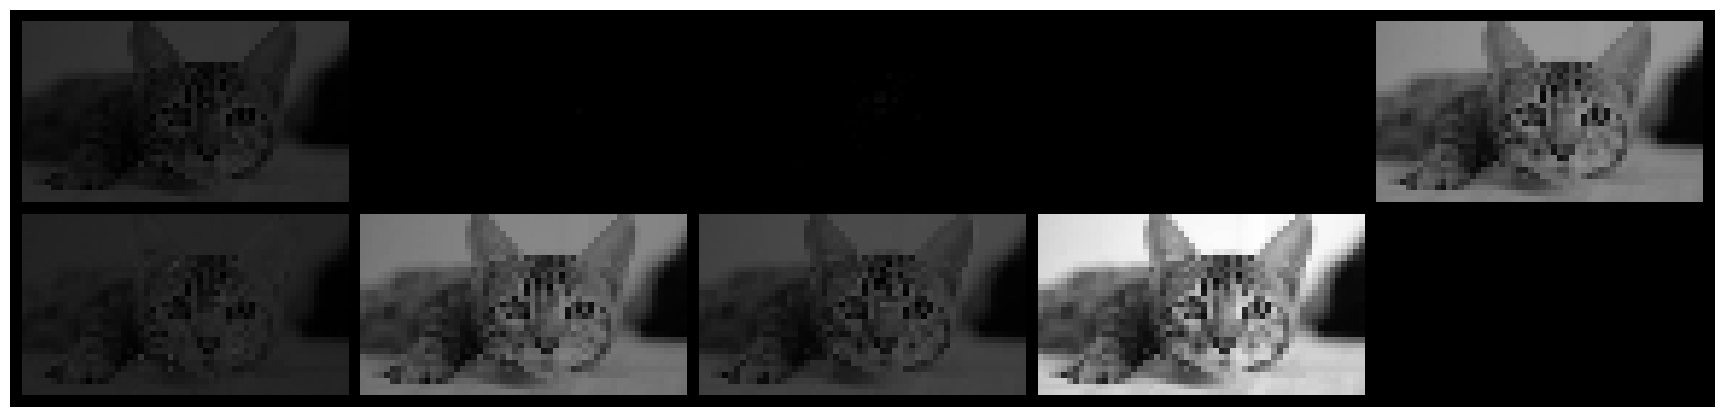

Original dimension : torch.Size([1, 3, 500, 885])
Dimension après convolution : torch.Size([1, 10, 31, 56])


In [25]:
vis_features(y_downsampled)
plt.show()

print("Original dimension : " + str(x.size()))
print("Dimension après convolution : " + str(y_downsampled.size()))

On remarque qu'avec un paramètre `stride = 16`, la dimensions de l'image originale est passée de $500 \times 885$ à $31 \times 56$. Il s'agit bien d'une **réduction de dimensions** ou **downsampling**

### `torch.nn.Conv2d` - le **padding**

Appliquer un filtre sur une image ou une feature map peut avoir une **interaction avec la bordure de l'image**, ce qui **diminue la dimension de l'image proportionellement à la taille du filtre**. Pour éviter ce phénomène, on peut ajouter un padding à l'image d'entrée en utiliser le paramètre `padding`. </br>

🛠 **EXERCICE :** Complétez la fonction cellule ci-dessous et implémentez la même convolution que précédemment, mais avec les paramètres `stride=1` et `padding=2`. Ensuite, apppliquez la convolution à l'image initiale `x`. </br>



In [26]:
### CODEZ ICI : Remplacez les None par votre code ###
conv_padding = torch.nn.Conv2d(3, 10, kernel_size=5, stride=1, padding=2, bias=False)
y_padding = torch.nn.functional.relu(conv_padding(x))
### FIN DU CODE ###

Visualisez maintenant les résultats à l'aide de la cellule ci-dessous et observez la **dimension des image obtenues**. </br>
Qu'observez vous ?

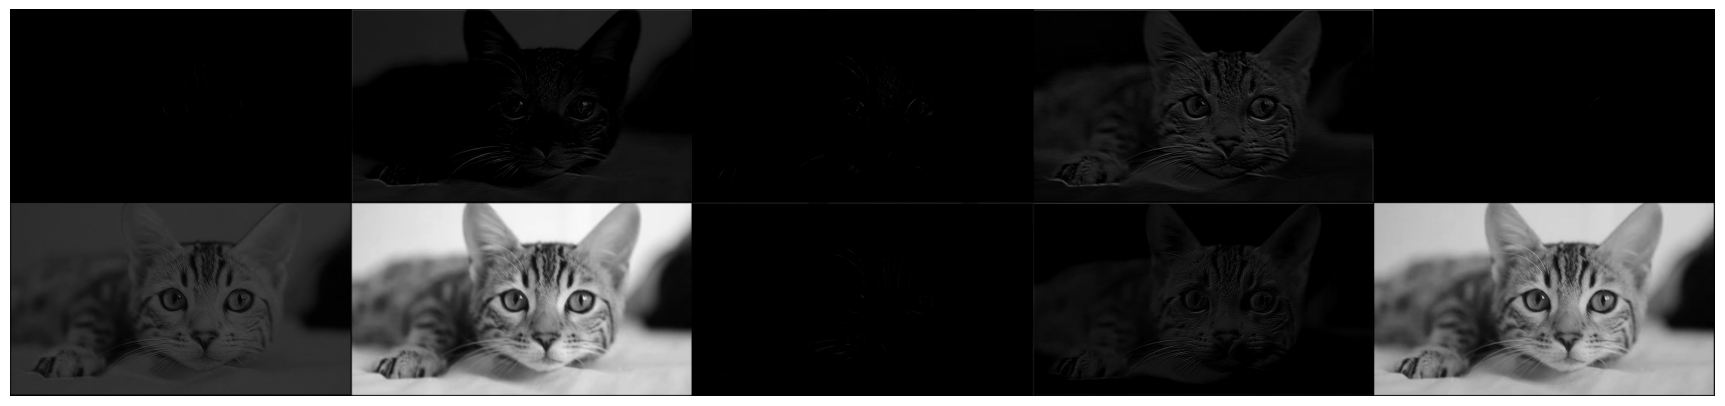

Original dimension : torch.Size([1, 3, 500, 885])
Dimension après convolution : torch.Size([1, 10, 500, 885])


In [27]:
vis_features(y_padding)
plt.show()

print("Original dimension : " + str(x.size()))
print("Dimension après convolution : " + str(y_padding.size()))

Vous pouvez observer que le paramètre `padding` permet de **préserver les dimensions** de l'image originale. Il permet notamment de conserver les informations présentes sur les bords de l'image.

### Utilisation de filtre connus

Nous allons maintenant implémenter nous même un filtre, appelé le [**Filtre Laplacien**](https://en.wikipedia.org/wiki/Discrete_Laplace_operator). Il s'agit d'un opérateur bien précis. </br>
Dans la cellule suivante, nous allons construire une convolution en utilisant le filtre Laplacien.

In [28]:
# Construction du filtre laplacien
w = torch.FloatTensor([[0, 1, 0],
                       [1, -4, 1],
                       [0, 1, 0]])
# Redimensionnement du filtre [3x3] -> [3x3x3x1] -> [1x3x3x3]
w = w.repeat(3, 1).reshape(1, 3, 3, 3)

# Creation de la convolution
conv_lap = torch.nn.Conv2d(3, 3, kernel_size=3, stride=1, padding=1, bias=False)
# Utilisation du filtre laplacien dans la convolution
conv_lap.weight = torch.nn.Parameter(w)

y_lap = conv_lap(x)

print(x.size())
print(y_lap.size())

torch.Size([1, 3, 500, 885])
torch.Size([1, 1, 500, 885])


Dans la cellule suivante, vous allez observer
- les **résultats de la convolution** en utilisant le **filtre laplacien**
- le même résultat mais en utilisant la fonction $-|x|$ afin de mieux visualiser le résultat. </br>



❓ Selon vous, quelles structures de l'image permet de détecter ce filtre ?

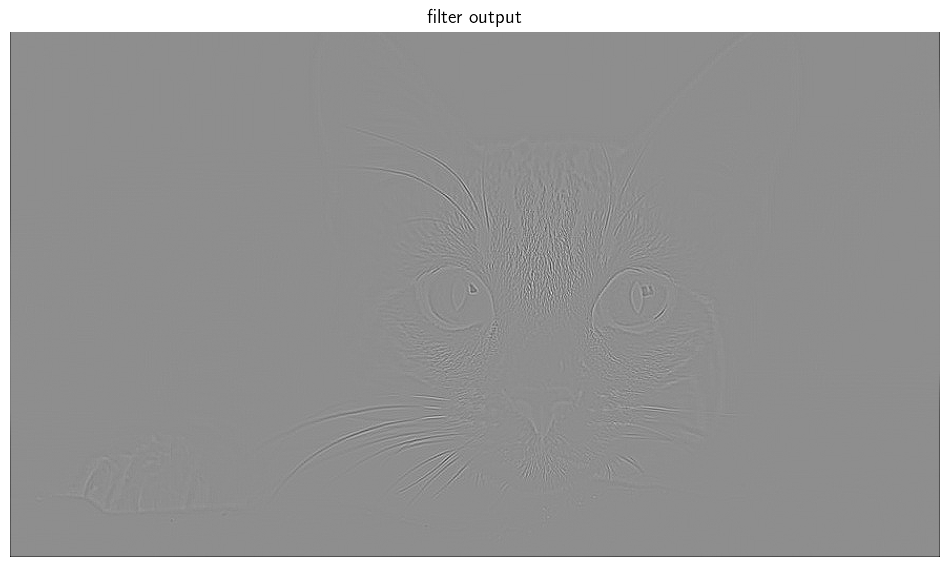

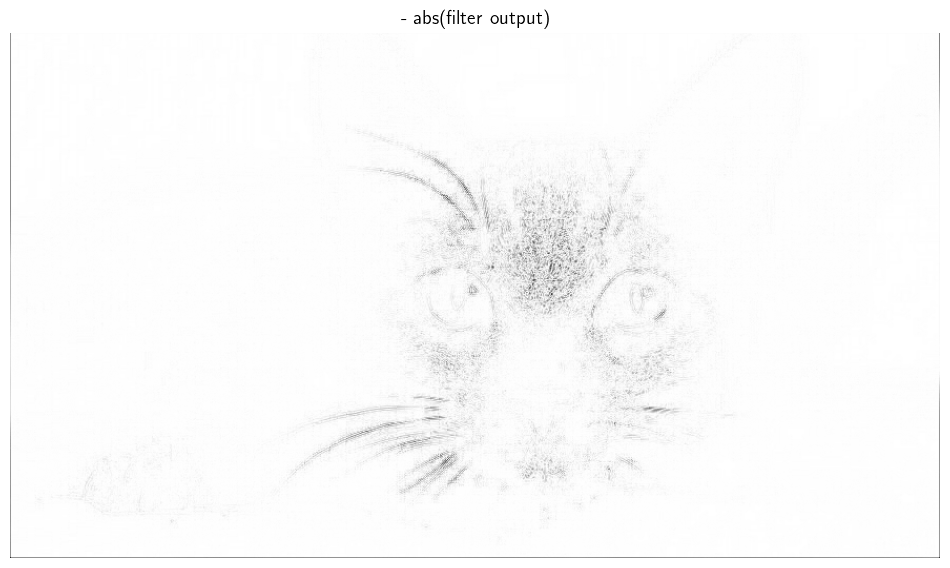

In [29]:
vis_features(y_lap, figsize=(12, 12))
plt.title('filter output')
plt.show()
vis_features(-torch.abs(y_lap), figsize=(12, 12))
plt.title('- abs(filter output)')
plt.show()

💡 Le filtre Laplacian est un **détecteur de contours**. Il permet de mettre en évidence dans une image les contours des objets représentés. </br>


## 1.2. Convolutions et fonctions d'activation non linéaires

Comme nous l'avons vu en cours, après l'obtention de feature maps par une opération de convolution, il est nécessaire d'appliquer une **fonction non linéaire**. </br>
Dans cet exemple, nous allons utiliser la fonction d'activation *Rectified Linear Unit (ReLU)*, dont la formule est rappelée ci-dessous :
$$
  y_{ijk} = \max\{0, x_{ijk}\}.
$$
</br>
On rappelle également la fonction `ReLU` de PyTorch : [`torch.nn.ReLU()`](https://pytorch.org/docs/stable/nn.html#torch.nn.ReLU). </br>

Dans l'exemple suivant on donne un exemple de convolution avec
- un filtre de taille $3 \times 1$
- 3 channels en input
- 2 feature maps en sortie
- `stride = 1`
- `padding = 0`

On applique la convolution à l'image originale, puis on **compose la sortie avec la fonction ReLU**



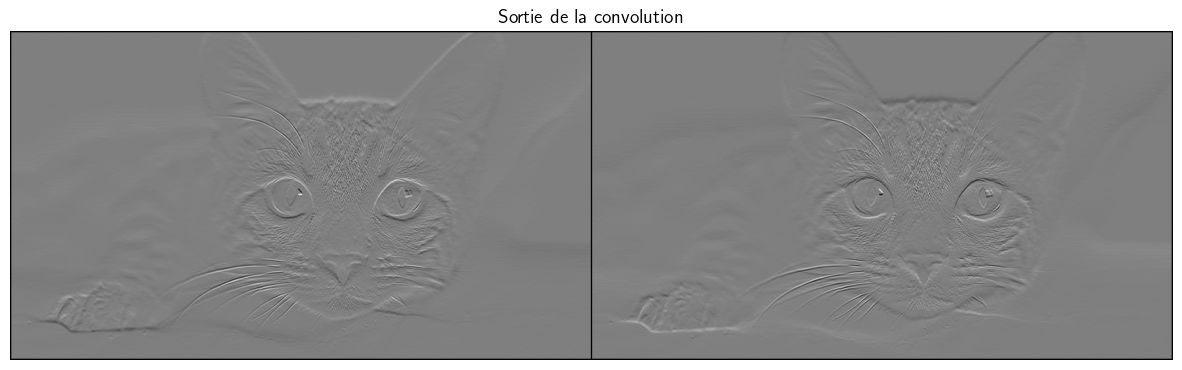

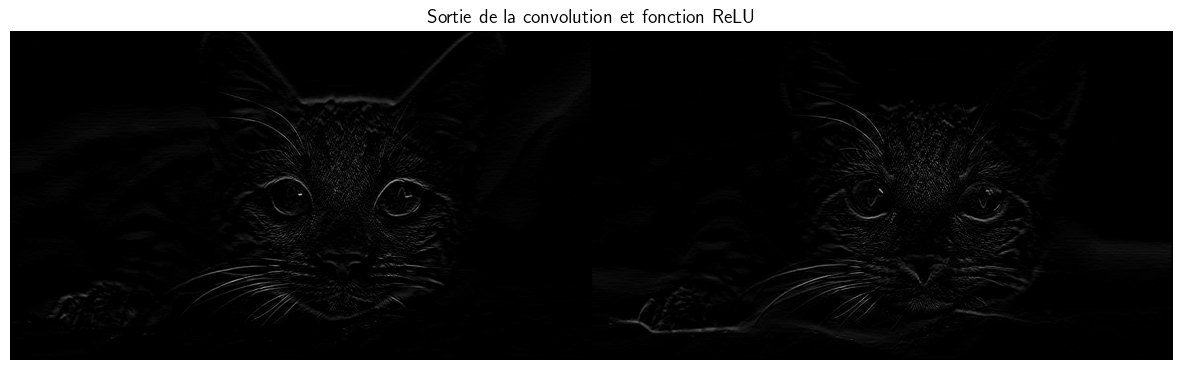

In [30]:
w = torch.FloatTensor([[1], [0], [-1]]).repeat(1, 3, 1, 1)
w = torch.cat((w, -w), 0)

conv = torch.nn.Conv2d(3, 2, kernel_size=(3, 1), stride=1, padding=0, bias=False)
conv.weight = torch.nn.Parameter(w)
relu = torch.nn.ReLU()

y = conv(x)
z = relu(y)

vis_features(y, figsize=(15, 15))
plt.title("Sortie de la convolution")
plt.show()
vis_features(z, figsize=(15, 15))
plt.title("Sortie de la convolution et fonction ReLU")
plt.show()

On remarque ici que le la convolution permet d'**extraire des zones bien particulières de l'image** (ici les contours horizontaux hauts et bas), puis la **fonction ReLU permet de ne garder que les zones d'intérêts** (où les pixels sont positifs).

🛠 **EXERCICE :** Construiez une opération de convolution à partir du [**Filtre de Sobel**](https://fr.wikipedia.org/wiki/Filtre_de_Sobel), un filtre très célèbre pour la détéction de contour. </br>
Pour le filtre de Sobel, vous utiliserez
$$ W_{sobel} = \begin{align}
\begin{pmatrix}
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 & 1 \\
\end{pmatrix}.
\end{align} $$

La convolution aura les paramètres suivant
- `in_channels=3`
- `out_channels=5`
- `kernel_size=7`
- `stride=1`
- `padding=1`

Une fois votre convolution implémentez vous appliquerez la convolution à l'image initiale, puis vous passerez le résultat dans une fonction `Tanh` (vous pourrez utiliser la fonction `torch.nn.Tanh`).

Original dimension : torch.Size([1, 3, 500, 885])
Dimension après convolution : torch.Size([1, 2, 500, 885])


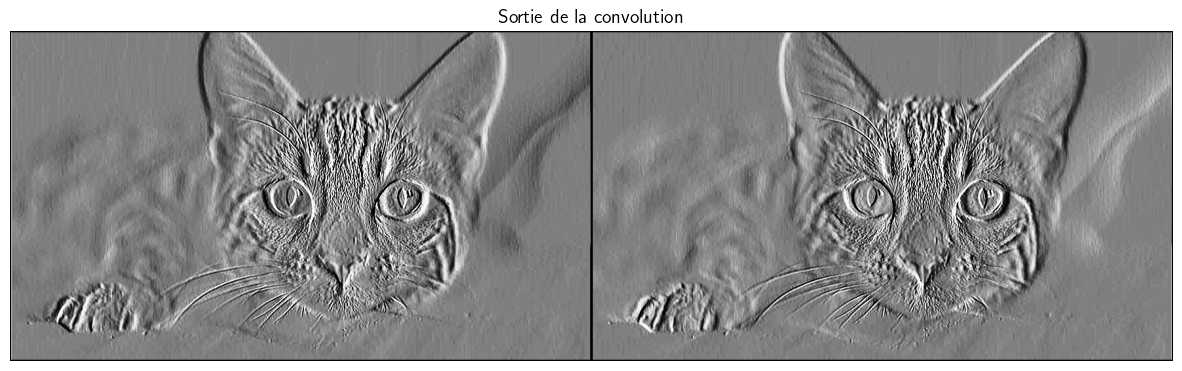

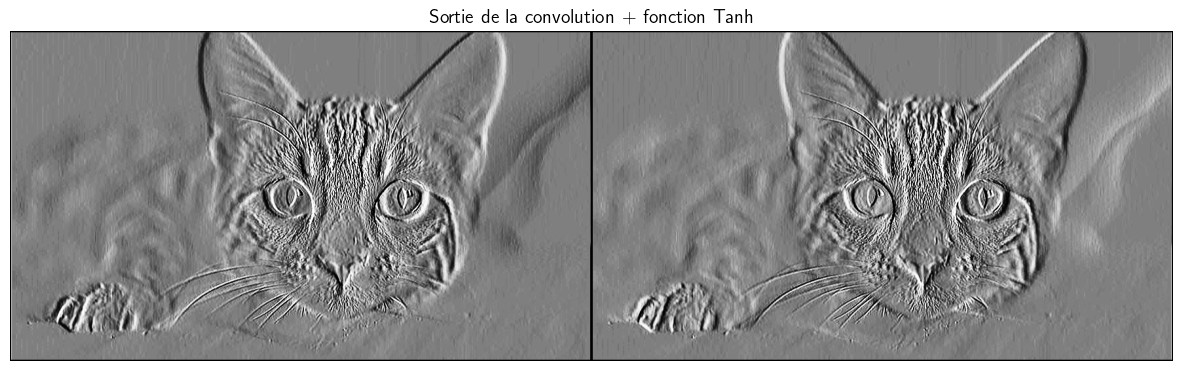

In [31]:
### CODEZ ICI : Remplacez les None par votre code ###

# Construction du filtre de sobel
w = torch.FloatTensor([[-1, 0, 1],
                       [-2, 0, 2],
                       [-1, 0, 1]]).repeat(1, 3, 1, 1)
# Redimensionnement du filtre , on veut obtenir un filtre final de dimensions [5x3x3x3]
w = torch.cat((w, -w), 0)

# Creation de la convolution
conv_sobel = torch.nn.Conv2d(3, 5, kernel_size=7, stride=1, padding=1, bias=False)
# Utilisation du filtre de sobel dans la convolution
conv_sobel.weight = torch.nn.Parameter(w)

# Fonction d'activation
tanh = torch.nn.Tanh()

y_sobel = tanh(conv_sobel(x))
z_sobel = tanh(conv_sobel(x))

print("Original dimension : " + str(x.size()))
print("Dimension après convolution : " + str(y_sobel.size()))

# Visualisation
vis_features(y_sobel, figsize=(15, 15))
plt.title("Sortie de la convolution")
plt.show()
vis_features(z_sobel, figsize=(15, 15))
plt.title("Sortie de la convolution + fonction Tanh")
plt.show()

### FIN DU CODE ###

Dans cette première partie, vous avez appris à **construire une convolution en PyTorch**. De plus, aux travers de différents exemple, vous avez pu voir l'**impact des différents paramètres (stride, padding, taille du kernel)** sur le résultat d'une convolution.

## 1.3. Pooling

Dans cette section, vous allez découvrir comment utiliser les opérateurs **pooling** en PyTorch. Pour rappel, on compte différents opérateur de pooling
- **max-pooling** (utilise l'opérateur maximum)
- **average-pooling** (utilise la moyenne sur tous les pixels)
- min pooling (utilise l'opérateur minimum)
- sum-pooling (utilise l'opérateur somme)

Les deux principaux opérateurs de pooling sont le **max-pooling** et l'**average-pooling**.

par exemple, *max-pooling* est défini par la formule suivante:
$$
   y_{ij} = \max \{ y_{i'j'} : i \leq i' < i+K, j \leq j' < j + K \}
$$
De même pour l'average-pooling
$$
   y_{ij} =  moyenne\{ y_{i'j'} : i \leq i' < i+K, j \leq j' < j + K \}
$$
où $K$ représente la taille du kernel.

<br>
<center><img src="https://drive.google.com/uc?export=view&id=1KaFe9lhfbCG9D4NKhOecHp7nb0_5CPne"width="300"/></center>


Et les fonctions correspondant au **max-pooling** et **average-pooling** dans Pytorch sont les suivantes [`torch.nn.MaxPool2d()`](https://pytorch.org/docs/stable/nn.html#torch.nn.MaxPool2d) et [`torch.nn.AvgPool2d()`](https://pytorch.org/docs/stable/nn.html#torch.nn.MaxPool2d). </br>
Ces fonctions prennent en entrée
- `kernel_size` : la taille de la fenêtre de pooling
- `stride` : le paramètre stride de la fenêtre de pooling
- `padding` : le nombre de pixels 0 à rajouter de part et d'autre de l'image



⚠️ Il est essentielle de retenir que l'**opérateur Pooling** ne contient pas de paramètres à apprendre, ils s'agit uniquement d'un opérateur qui sert à la **réduction de dimension**.

Dans l'exemple suivant, nous allons voir l'effet de l'opérateur pooling sur un exemple. On va appliquer respectivement un **max-pooling** et **un avg-pooling** sur l'image, avec les paramètres suivants
- `kernel_size=15`
- `stride=2`

❓ Que remarquez vous sur les dimensions de l'image obtenue ? Sur le rendu de l'image ?

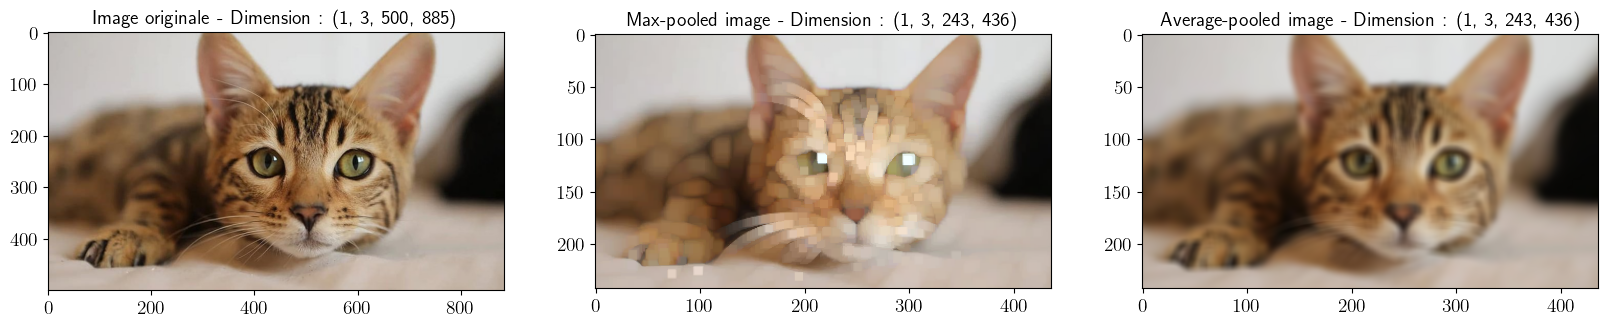

In [32]:
# Definition des opérateur pooling et de leurs paramètres
max_pooling = torch.nn.MaxPool2d(15, stride=2)
avg_pooling = torch.nn.AvgPool2d(15, stride=2)

# On applique le max et avg pooling à l'image originale
y_maxpool = max_pooling(x)
y_avgpool = avg_pooling(x)

# Affichage des résultats
plt.figure(figsize=(20, 15))

plt.subplot(1, 3, 1)
plt.imshow(x.squeeze().permute(1, 2, 0).numpy())
plt.title("Image originale - Dimension : " + str(tuple(x.shape)))

plt.subplot(1, 3, 2)
plt.imshow(y_maxpool.squeeze().permute(1, 2, 0).numpy())
plt.title("Max-pooled image - Dimension : " + str(tuple(y_maxpool.shape)))

plt.subplot(1, 3, 3)
plt.imshow(y_avgpool.squeeze().permute(1, 2, 0).numpy())
plt.title("Average-pooled image - Dimension : " + str(tuple(y_avgpool.shape)))
plt.show()

💡 Vous pouvez remarquer que
- les **opérateur pooling** on réduit les dimensions de l'image par plus de 2. Toujours selon l'équation suivante
$$output = \frac{input - K + 2P}{S} + 1$$ </br>
- l'opérateur **average-pooling** calcul une moyenne de tous les pixels d'une fenêtre, cela se traduit par un image floutée en sortie
- l'opérateur **max-pooling** extrait les pixels maximum de la fenêtre, cela se traduit par une image davantage pixelisée

# Partie 2 - Les réseaux de neurones convolutifs

Dans cette partie, vous allez découvrir et implémentez vos premiers réseaux de neurones convolutifs ou Convolutional Neural Networks (CNNs) en anglais. </br>
Vous allez découvrir
- comment construire un CNN
- entraîner votre modèle
- évaluer votre modèle


Dans cet exercice pratique, nous allons utiliser un dataset connu en Computer-Vision : [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html). Il est disponible dans la liste des datasets fournis par [TorchVision](https://pytorch.org/vision/stable/datasets.html).

In [48]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np

device = torch.device("mps")
device

device(type='mps')

⚠️ Attention, dans cette partie, vous allez avoir besoin d'un GPU pour entraîner votre modèle car cela réduit considérablement le temps d'entraînement. **Vérifiez bien que votre  variable device `device` est mappée à `device(type='cuda')`**

## 2.1. Import et chargement des données

Dans la cellule suivante nous allons charger les données de [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) en utilisant TorchVision. Le dataset est composé de 60000 images RGB de résolution $32\times 32$ représentant 10 classes. Le dataset est équilibré au niveau des classes : 6000 images par classes. Le dataset est séparé entre **50000 images de training** et **10000 images de validation**. </br>

Les 10 classes représentées sont les suivantes : `airplane`, `automobile`, `bird`, `cat`, `deer`, `dog`, `frog`, `horse`, `ship`, `truck`.

Nous utiliserons des objets `Dataset` et `DataLoader` de `torch.utils.data`, comme dans le précédent notebook.

In [49]:
dataset = 'cifar10'

# Pré-processing
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])
# Création des datasets
train_dataset = datasets.CIFAR10(root='.', train=True, download=True, transform=data_transform)
validation_dataset = datasets.CIFAR10(root='.', train=False, download=True, transform=data_transform)

batch_size = 64

# Création des DataLoader de training et validation
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size=batch_size, shuffle=False, num_workers=0)

Files already downloaded and verified
Files already downloaded and verified


Visualisons maintenant les images et leurs labels respectifs

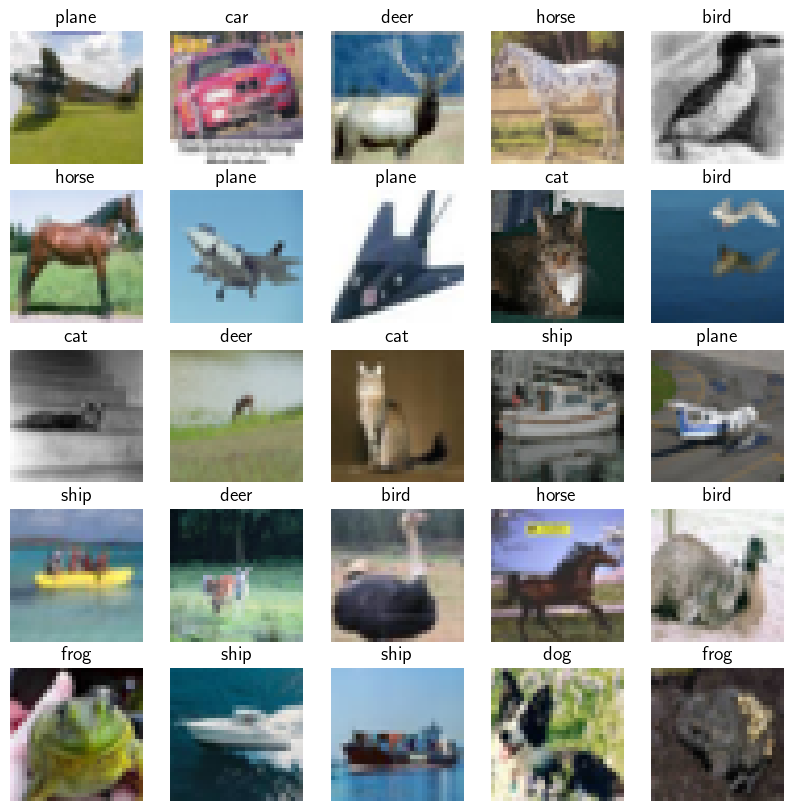

In [50]:
labels = ['plane', 'car', 'bird', 'cat',
          'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

dataiter = iter(train_loader)
images, cat_labels = next(dataiter)

images = images / 2 + 0.5
images_np = images.numpy()
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(np.transpose(images_np[i], (1, 2, 0)))
    plt.axis("off")
    plt.title(labels[cat_labels[i].numpy()])
plt.show()

## 2.2. Larchitecture d'un CNN pour la classification

📚 Dans le cadre d'une tâche de classification, les **réseaux de neurones convolutionnels** ou Convolutional Neural Networks (CNNs) sont séparés en 2 blocs distincts
- Un **bloc d’extraction de features** (pour l'apprentissage des variables)
- Un **bloc de classification** (qu'on appel Fully-Connected)
<br>


Un CNN peut être représenté de la façon suivante :
<center><img src="https://drive.google.com/uc?export=view&id=135tzKp4plA92Cp5PSaUbb1hNWS4B9Pms"width="1000"/></center>

Le bloc d'**Extraction de features** est composés de **plusieurs blocs de convolutions**. Un **bloc de convolutions** est composé de
- une **convolution** qui sert à l'**extraction de features**
- une **fonction d'activation** qui ajoute de la **non linéarité**
- une **couche de pooling** afin de **réduire la dimensionnalité**

Dans l'exemple suivant on utilisera `torch.nn.Sequential` pour implémenter le block de convolution

In [51]:
conv_block = nn.Sequential(
    nn.Conv2d(3, 16, 5, bias=False),
    nn.ReLU(),
    nn.MaxPool2d(2, 2)
)

Le bloc de convolution contient
- une **couche de convolution** avec les paramètres suivants
  - input channels : 3
  - output channels : 16
  - taille du kernel : (5,5)
- une fonction d'activation **ReLU**
- un **max-pooling** avec les paramètres suivants
  - taille du kernel : (2,2)
  - stride : 2

On passe ensuite le batch `images` défini précédemment dans le bloc de convolution

In [52]:
y = conv_block(images)
print(f"Dimension des feature maps générées : {tuple(y.shape)}")

Dimension des feature maps générées : (64, 16, 14, 14)


Les features maps générées sont de dimension $64\times 16\times 14\times 14$, avec $64$ **la taille du batch**, $16$ **le nombre de features maps** et $14 \times 14$ **la dimension des features maps**. </br>
On peut visualiser les features générées.
Prenons, par exemple la première image du batch

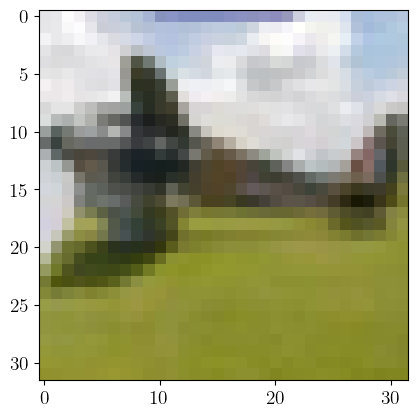

In [53]:
plt.imshow(images[0, ...].detach().numpy().transpose(1, 2, 0))

On visualise les features générées en appelant la fonction suivante `vis_features`

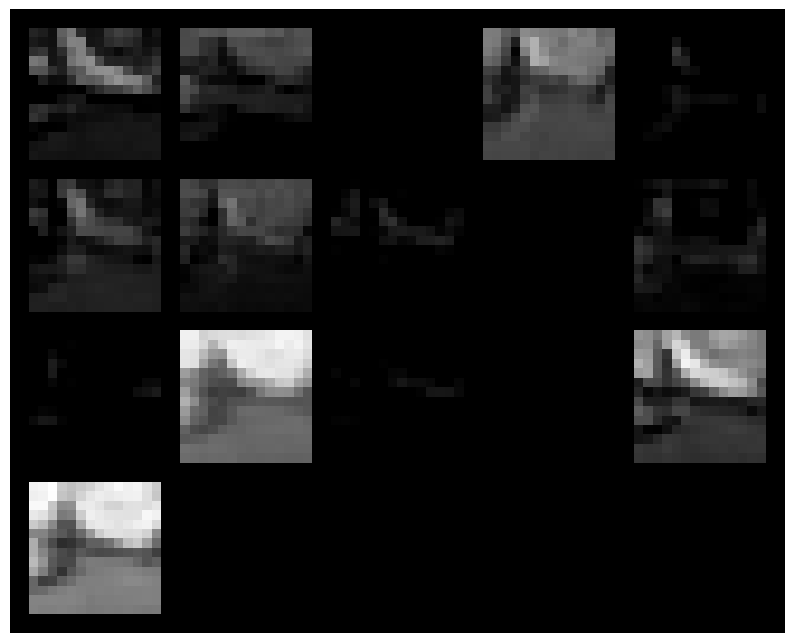

In [54]:
# Visualisation des ouputs de y
def vis_features(y, figsize=(22, 20)):
    # Redimensionnement du tenseurs
    out = y.permute(1, 0, 2, 3)
    # Normalisation entre 0 et 1
    out = (out - out.min().expand(out.size())) / (out.max() - out.min()).expand(out.size())
    # Creation d'une grille d'images
    out = torchvision.utils.make_grid(out, nrow=5)
    # Conversion en numpy array
    out = np.transpose(out.detach().numpy(), (1, 2, 0))
    # affichage
    plt.figure(figsize=figsize)
    plt.imshow(out)
    plt.gca().grid(False)
    plt.axis("off")


vis_features(y[0, ...].unsqueeze(0), figsize=(10, 10))

Il est important de noter que les features extraites ne sont **pas toujours interprétables par l'oeil humain**, mais elles le sont pour le modèle. </br>

Maintenant que vous avez appris à **implémenter un bloc convolutif**, vous pouvez maintenant **construire l'architecture d'un CNN**. Il vous suffit d'**assembler plusieurs blocs convolutifs** dans une classe en utilisant `nn.Module` et de finir par **un réseau de neurones** qu'on appelle aussi **Fully-connected**. </br>

La procédure est la suivante

```python
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv_layer1 = nn.Sequential("votre_première_couche")
        self.conv_layer2 = nn.Sequential("votre_deuxième_couche")
        ...
        self.fully_connected = nn.Sequential("réseau_de_neurone")
        

    def forward(self, x):
        x = self.conv_layer1(x) # forward de la 1ere couche
        x = self.conv_layer2(x) ## forward de la 2eme couche
        ...
        x = x.view(x.size(0), -1) # il faut ici flatten le vecteur
        x = self.fully_connected(x)
        return x
```

⚠️ Il faut toujours faire attention aux **dimension de la sortie du bloc de convolution**. Généralement, il est comment de d'**aplatir l'output** (flatten) pour qu'il puisse rentrer dans le **réseau de neurones de classification**.


🛠 **EXERCICE :**
Construisez dans la cellule suivante un CNN avec les paramètre suivants

- ***Conv layer 1*** :  
  - Convolution avec un filtre de taille $5\times 5$, 16 feature maps - fonction d'activation Tanh
  - max pooling avec un kernel de taille $2\times 2$, stride = 2
- ***Conv layer 2*** :  
  - Convolution avec un filtre de taille $5\times 5$, 128 feature maps - fonction d'activation Tanh
  - max pooling avec un kernel de taille $2\times 2$, stride = 2
- Flatten la sortie en vecteur
- ***Fully Connected*** :  
  - Une couche de 64 neurones - fonction d'activation ReLU
  - Une couche de sortie de 10 neurones


In [73]:
### CODEZ ICI : Remplacez les None par votre code ###

class conv_net(nn.Module):
    def __init__(self):
        super(conv_net, self).__init__()
        self.conv_layer1 = nn.Sequential(
            nn.Conv2d(3, 16, 5, bias=False),
            nn.Tanh(),
            nn.MaxPool2d(2, 2)
        )
        self.conv_layer2 = nn.Sequential(
            nn.Conv2d(16, 128, 5, bias=False),
            nn.Tanh(),
            nn.MaxPool2d(2, 2)
        )
        self.fully_connected = nn.Sequential(
            nn.Linear(128 * 5 * 5, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        x = self.conv_layer1(x)
        x = self.conv_layer2(x)
        x = x.view(x.size(0), -1)
        x = self.fully_connected(x)
        return x

### FIN DU CODE ###

Initialisez votre modèle et mappez le au GPU en executant la cellule suivante.

In [74]:
model = conv_net().to(device)
print(model)

conv_net(
  (conv_layer1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1), bias=False)
    (1): Tanh()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_layer2): Sequential(
    (0): Conv2d(16, 128, kernel_size=(5, 5), stride=(1, 1), bias=False)
    (1): Tanh()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fully_connected): Sequential(
    (0): Linear(in_features=3200, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=10, bias=True)
  )
)


🎉 Féliciations ! Vous avez créée votre premier réseau de neurones convolutif ! </br>
Maintenant, l'**objectif est de l'entraîner**. La **procédure est la même que pour un réseau de neurone classique** fully-connected :  
- choix de l'**optimiseur**
- choix de la **loss**
- implémentation d'une fonction d'**entraînement d'une epoch**
- implémentation d'une fonction de **validation d'une epoch**

## 2.3. Le choix de l'optimiseur

Maintenant que vous avez implémenté l'architecture du CNN, il faut choisir l'optimiseur.

Pour rappel, l'objet `torch.optim` contient plusieurs optimiseurs :.
- **Stochastique gradient descent (SGD)** :  `torch.optim.SGD`
- **RMS Prop** :  `torch.optim.RMSprop`
- **Adam** : `torch.optim.Adam`

Ici, nous allons utiliser `torch.optim.SGD`, dont les différent arguments sont :
- Les **paramètres du modèle**
- Le **learning rate**

🛠 **EXERCICE :** Complétez la cellule suivante en initialisant un optimiseur `SGD` avec un `learning rate` égal à $0.01$.


In [75]:
### CODEZ ICI : Remplacez les None par votre code ###

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

### FIN DU CODE ###

## 2.4. Le choix de fonction de loss

*Rappel sur les fonctions de coût :* </br>
Plusieurs fonctions de coût sont implémentées dans le module `torch.nn`, les principales :
- **binary cross entropy** : classification binaire `nn.BCELoss()`
- **cross entropy** : classification multiclasse `nn.CrossEntropyLoss()`  
- d'autres fonctions de loss classique

Dans notre cas, nous avons un datasets constritué d'images chacunes rattachées à une classe, parmi 10 classes. Il s'agit donc d'une **classification multi-classe** : On va utiliser la **Cross Entropy**.


🛠 **EXERCICE :** Complétez la cellule suivante en utilisant la Cross Entropy loss comme `criterion`.


In [76]:
### CODEZ ICI : Remplacez les None par votre code ###

criterion = nn.CrossEntropyLoss()

### FIN DU CODE ###

## 2.5. Entraîner une epoch


🛠 **EXERCICE :** Complétez la fonction `train` qui entraîne le modèle sur l'intégralités des batch du dataset d'entrainement. </br>
On rappelle les différentes étapes à implémenter
- passer les données sur GPU
- ne pas oublier de **reinitialiser les gradients** a chaque batch
- **forward propagation**
- calcul de la **loss**
- **back propagation**
- **mise à jour** des poids

⚠️ Ne jamais oublier de spécifier `model.train()` lorsque l'on entraîne un modèle. En effet, cela permet de spécifier que le modèle est en "mode" entraînement.

In [77]:
### CODEZ ICI : Remplacez les None par votre code ###

def train(model, epoch, log_interval=200):
    # Passer le modèle en mode train
    model.train()

    for batch_idx, (data, target) in enumerate(train_loader):
        data = data.to(device)
        target = target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                       100. * batch_idx / len(train_loader), loss.data.item()))

### FIN DU CODE ###

## 2.6. Validation d'un epoch

Une fois le modèle entrainé sur une epoch (c'est à dire l'intégralités du dataset de train), il est indispensable de le **valider/evaluer sur les data de validation** (et éventuellement les data d'entrainement). </br>
L'étape validation implique
- le calcul de la **loss**
- le calcul des **métriques d'évaluation**

La métrique que nous allons utiliser dans cet exercice est l'**Accuracy**, elle est définie de la façon suivante : </br></br>
$$Accuracy = \frac{nombre\ de\ prédictions\ correctes}{nombre\ total\ d'exemples}$$

---

🛠 **EXERCICE :** Complétez la fonction `validate` qui entraîne le modèle sur l'intégralités du dataset de train ou de validation. </br>
Résumons les différentes étapes de cette fonction de validation:
- passez les data sur GPU
- **forward propagation**
- calculez la **loss**
- ajoutez  la loss a la liste globale (on veut calculer la loss moyenne)
- calculez les **probabilités pour chaque classe** à partir de la sortie du réseau (**utilisez un Softmax sur la sortie brut du modèle**) Pour rappel, la loss `CrossEntropyLoss` de PyTorch utilise la sortie brute du réseau (les logits)
- calculez la prédiction (la plus grande probabilité parmi toutes les classes)
- calculez le **nombre de prédictions correctes**
</br>
Puis à la fin de la boucle:
- calculez la **loss moyenne**
- calculer l'**accuracy** à partir du **nombre de prédictions correctes**

⚠️ Ne jamais oublier de spécifier `model.eval()` lors de l'étape de validation. En effet, cela permet de spécifier que le modèle est en "mode" évaluation.


💡 Astuces
- Pour le calcul des prédiction à partir des probabilités, on pourra utiliser [`torch.max()`](https://pytorch.org/docs/stable/generated/torch.max.html). Lire attentivement la documentation. La `torch.max` retourne la un `tuple` `(valeur, indice)` qui correspond à la `valeur` max et son `indice` dans le tenseur.
- Pour le calcul de l'**accuracy**, on pourra utiliser la fonction [torch.eq](https://pytorch.org/docs/stable/generated/torch.eq.html) qui permet de calculer l'égalité élément à élément entre deux tenseurs. Attention, le tenseur de sortie est un booléen, il faudra adapter le type du tenseur !
- ⚠️ Important : Au dessus de la fonction, on utilise le décorateur [`@torch.no_grad()`](https://pytorch.org/docs/stable/generated/torch.no_grad.html). Cette fonction permet de garder le paramètre `requires_grad = False` et ainsi de ne pas calculer les gradients au fur et à mesure des opération. En effet, lors de l'étape de **validation**, il n'y a **pas d'étape de back-propagation**, donc pas d'utilité de propager les gradients.
On peut aussi utiliser l'opérateur `torch.no_grad` de la façon suivante :
```python
with torch.no_grad():
      #les calculs que vous souhaitez effectuer
```

In [80]:
### CODEZ ICI : Remplacez les None par votre code ###

@torch.no_grad()
def validate(model, loader, loss_vector, accuracy_vector, step="Validation"):
    # Passer le modèle en mode eval
    model.eval()
    # initialiser les valeurs de loss et de prediction correctes
    val_loss, correct = 0, 0

    # Boucler sur tous les batch du dataset
    for batch_idx, (data, target) in enumerate(train_loader):
        data = data.to(device)
        target = target.to(device)

        # Passez les données dans le réseau (forward propagation)
        output = model(data)

        # Ajoutez la loss du batch à la liste val_loss (utiliser ici .data.item pour obtenir la valeur)
        val_loss += criterion(output, target).data.item()

        # Calculez les prédictions
        pred_softmax = F.softmax(output, dim=1)

        # Passez les outputs logits
        pred = torch.max(pred_softmax, dim=1)[1]

        # Calculez le nombre de prédiction correctes et on ajoute à la liste correct
        correct += torch.eq(pred, target).sum().item()

        # Moyenner la loss par le nombre d'exemples
    val_loss = val_loss / len(loader.dataset)
    loss_vector.append(val_loss)

    # Calculez l'accuracy
    accuracy = correct / len(loader.dataset)
    accuracy_vector.append(accuracy)

    print('{} set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        step, val_loss, correct, len(loader.dataset), accuracy))

### FIN DU CODE ###

Maintenant que vous avez implémenté avec succès les fonctions `train` et `validate`, il est temps d'entraîner votre réseau.

## 2.7. Entrainement du modèle

Exécuter la cellule suivante pour entraîner votre réseau de neurone.
On entraîne le modèle sur $20$ epochs en appliquand le schéma suivant
A chaque epoch, on itère
- étape de **training** sur le **dataset de train**
- **validation** sur le **dataset de train**
- **validation** sur le **dataset de validation**

⚠️ Il est important de monitorer la **loss** et les métriques (ici l'**accuracy**) tout au long du training, car elle donnent des informations importantes sur les **performances du modèle entraîné**. </br>
Dans cet exemple, nous utilisons des listes pour stocker les valeurs des loss et métriques pour chaque epoch.

In [81]:
%%time
epochs = 30

loss_training, acc_training = [], []
loss_validation, acc_validation = [], []
for epoch in range(1, epochs + 1):
    train(model, epoch)
    validate(model, train_loader, loss_training, acc_training, "Training")
    validate(model, validation_loader, loss_validation, acc_validation, "Validation")

Train Epoch: 1 [0/50000 (0%)]	Loss: 1.706696
Train Epoch: 1 [12800/50000 (26%)]	Loss: 1.619147
Train Epoch: 1 [25600/50000 (51%)]	Loss: 1.619396
Train Epoch: 1 [38400/50000 (77%)]	Loss: 1.394720
Training set: Average loss: 0.0234, Accuracy: 23247/50000 (0%)
Validation set: Average loss: 0.1172, Accuracy: 23247/10000 (2%)

Train Epoch: 2 [0/50000 (0%)]	Loss: 1.393589
Train Epoch: 2 [12800/50000 (26%)]	Loss: 1.496812
Train Epoch: 2 [25600/50000 (51%)]	Loss: 1.648119
Train Epoch: 2 [38400/50000 (77%)]	Loss: 1.417415
Training set: Average loss: 0.0220, Accuracy: 25008/50000 (1%)
Validation set: Average loss: 0.1101, Accuracy: 25008/10000 (3%)

Train Epoch: 3 [0/50000 (0%)]	Loss: 1.610313
Train Epoch: 3 [12800/50000 (26%)]	Loss: 1.262720
Train Epoch: 3 [25600/50000 (51%)]	Loss: 1.467905
Train Epoch: 3 [38400/50000 (77%)]	Loss: 1.268610
Training set: Average loss: 0.0208, Accuracy: 26406/50000 (1%)
Validation set: Average loss: 0.1037, Accuracy: 26406/10000 (3%)

Train Epoch: 4 [0/50000 (0%)

KeyboardInterrupt: 

## 2.8. Les courbes d'entrainement

Maintenant que vous avez entraîné votre modèle, il faut **regarder les courbes d'apprentissage**, car elles sont **importantes pour la validation d'un modèle**. </br>
Executer la cellule suivant pour mettre en évidence les courbes d'apprentissage de votre entraînement. </br>
❓ Quelles informations importantes pouvez vous en tirer ?

ValueError: x and y must have same first dimension, but have shapes (30,) and (0,)

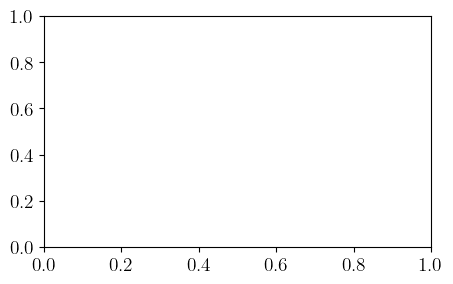

In [47]:
plt.figure(figsize=(5, 3))
plt.plot(np.arange(1, epochs + 1), loss_training)
plt.plot(np.arange(1, epochs + 1), loss_validation)
plt.legend(['training', 'validation'])
plt.title('validation loss')

plt.figure(figsize=(5, 3))
plt.plot(np.arange(1, epochs + 1), acc_training)
plt.plot(np.arange(1, epochs + 1), acc_validation)
plt.legend(['training', 'validation'])
plt.title('validation accuracy');

💡 On peut observer sur les courbes d'apprentissage, qu'au fur et à mesure de l'entraînement, **les courbes sur le dataset de train continue à progresser, tandis que celle du dataset de validation semble peu à peu stagner**. </br> Les performances sur l'ensemble de train sont bien supérieures à celles sur l'ensemble de validation : **forte suspiscion d'overfitting** !

## 2.9. Comment prévenir l'overfitting ?

📚**Rappel de cours** </br>
L’un des fondamentaux de l’entrainement d’un modèle de Deep Learning est d’éviter le **sur-apprentissage ou overfitting**
L'overfitting se tradient de la façon suivante
- Le **modèle est trop proche des données d’entrainement**
- Les performances du modèle sur d’autres données sont mauvaises

Il existes plusieurs procédures pour éviter le sur-apprentissage
- la **régularisation**
- l'utilisation du **drop-out**
- l'**augmentation de données** ou data augmentation (souvent utilisée en Computer Vision). </br>



Dans cette partie, nous allons utiliser la même architecture que la précédent, mais l'entraîner en utilisant
- du **drop-out**
- de la **data-augmentation**

### 2.9.1. L'augmentation de données ou data augmentation

Dans cette partie nous allons redéfinir le dataset en y ajoutant un certain nombre de transformations. Le but est d'agrandir la taille du dataset, en évitant d'utiliser plusieurs fois le nombre d'exemple et ainsi d'éviter le surapprentissage. </br>

Un certain nombre d'augmentations sont implémentées dans `torchvision.transforms` et sont adaptées aux objets `Dataset` de PyTorch. Vous pouvez regarder la [documentation officielle de PyTorch](https://pytorch.org/vision/stable/transforms.html), pour voir toutes les transformations proposées. Vous trouverez par ailleurs un [exemple](https://pytorch.org/vision/stable/auto_examples/plot_transforms.html#sphx-glr-auto-examples-plot-transforms-py) qui regroupe et illustre toutes les transformations proposées dans le module `torchvision.transforms`. </br>

Dans notre exemple, nous allons utiliser les deux transformations suivantes :

- [`RandomHorizontalFlip`](https://pytorch.org/vision/stable/generated/torchvision.transforms.RandomHorizontalFlip.html#torchvision.transforms.RandomHorizontalFlip) qui permet de renverser l'image horizontalement de façon aléatoire selon ont probabilité définie
- [`RandomRotation`](https://pytorch.org/vision/stable/generated/torchvision.transforms.RandomRotation.html#torchvision.transforms.RandomRotation) qui permet d'effectuer une rotation de l'image de façon aléatoire dans un interval d'angulation défini



⚠️ La **data augmentation** s'applique **uniquement sur le dataset de training**, **pas sur le dataset de validation**.



In [ ]:
data_augmentation = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    transforms.RandomHorizontalFlip(p=0.2),
    transforms.RandomRotation(degrees=(-10, 10)),
])

data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# Création des datasets
train_dataset = datasets.CIFAR10(root='.', train=True, download=True, transform=data_augmentation)
validation_dataset = datasets.CIFAR10(root='.', train=False, download=True, transform=data_transform)

batch_size = 64

# Création des DataLoader de training et validation
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size=batch_size, shuffle=False, num_workers=0)


On peut observer ci-dessous les image générées par **augmentation de données** sur le dataset de train

In [ ]:
labels = ['plane', 'car', 'bird', 'cat',
          'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

dataiter = iter(train_loader)
images, cat_labels = next(dataiter)

images = images / 2 + 0.5
images_np = images.numpy()
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(np.transpose(images_np[i], (1, 2, 0)))
    plt.axis("off")
    plt.title(labels[cat_labels[i].numpy()])
plt.show()

On observe que les images ont toutes des **rotations d'angulation différentes allant de -10 à 10 degrés**.

### 2.9.2. Le drop-out

📚 **Rappel de cours**
Une deuxième méthode pour prevenir le **surapprentissage** est l'utilisation de ce qu'on appelle le **drop-out**.
Cette méthode **s'applique aux réseaux de neurones traditionnels** de type fully-connected, donc dans notre réseau, dans le bloc de classification. </br>

Le **drop-out** consiste à **désactiver aléatoirement des neurones lors de l’apprentissage à chaque itération**. Ainsi, les neurones désactivés ne contribuent plus aux forward et backward propagations. Le drop-out est **équivalent à entrainer un modèle différent à chaque itération**.

⚠️ Le **drop-out ne s'applique qu'au moment de l’entrainement**, pas lors de l'étape de validation, ni lors de l'étape de prédiction. Il est important ici de ne pas oublier de spécifier si le modèle est en mode `train` ou en mode `eval`.

L'implémentation du Drop-out en PyTorch est implémenté dans le module `torch.nn`. </br>
La fonction `torch.nn.Dropout` prend en argument une probabilité `p` qui correspond à la proportion de neurones à désactiver. </br>

Le **drop-out s'insère juste après une couche fully connected**, de la façon suivant



```python
class conv_net(nn.Module):
    def __init__(self):
        super(conv_net, self).__init__()
        self.conv_layer1 = "votre couche de convolution 1"
        self.conv_layer2 = "votre couche de convolution 1"
        self.fully_connected1 = "votre couche fully connected 1"
        self.fully_connected2 = "votre couche fully connected 2"
        

    def forward(self, x):
        x = self.conv_layer1(x)
        x = self.conv_layer2(x)
        x = x.view(x.size(0), -1)
        x = self.fully_connected1(x)
        # Ajoutez une couche de dropout
        x = nn.Dropout(p=0.3)
        x = self.fully_connected2(x)
        # Ajoutez une couche de dropout
        x = nn.Dropout(p=0.3)
        return x
```

Dans cet exemple, nous allons reprendre l'implémentation de notre modèle `conv_net` et ajouter des couches de dropout.

🛠 **EXERCICE :**
Complétez l'architecture de modèle suivante et **ajoutez une couche de dropout** à un endroit spécifiquement choisi. Vous utiliserez un couche de `nn.Dropout` avec un paramètre `p=0.2`.

💡 N.B. On ne peut pas appliquer de drop-out à la dernière couche du réseau.


In [ ]:
### CODEZ ICI : Remplacez les None par votre code ###

class conv_net_dropout(nn.Module):
    def __init__(self):
        super(conv_net_dropout, self).__init__()
        self.conv_layer1 = nn.Sequential(
            nn.Conv2d(3, 16, 5, bias=False),
            nn.Tanh(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.conv_layer2 = nn.Sequential(
            nn.Conv2d(16, 128, 5, bias=False),
            nn.Tanh(),
            nn.MaxPool2d(kernel_size=2, stride=2))

        self.fully_connected1 = nn.Linear(128 * 5 * 5, 64)
        self.fully_connected2 = nn.Linear(64, 10)

        self.relu = nn.ReLU()
        self.dropout = None

    def forward(self, x):
        # bloc convolutif
        x = self.conv_layer1(x)
        x = self.conv_layer2(x)
        x = x.view(x.size(0), -1)

        # bloc fully-connected
        x = None
        x = None
        x = None
        x = None

        return x

### FIN DU CODE ###

In [ ]:
images, labels = next(iter(train_loader))

In [ ]:
model_dropout(images.cuda()).shape

### 2.9.3. Entraînement du modèle

Nous allons maintenant entraîner la **modèle avec drop-out**, sur le **dataset de train avec data-augmentation**. </br>
Dans la cellule suivante on **initialiser le modèle et l'optimizer** à partir des poids du modèle. Et on redéfinit le `criterion`.  

In [ ]:
model_dropout = conv_net_dropout().to(device)
optimizer = torch.optim.SGD(model_dropout.parameters(), lr=0.01)

criterion = nn.CrossEntropyLoss()

Entrainons maintenant `model_droupout` en utilisant les fonction `train` et `validate` implémentées précédemment

In [ ]:
%%time
epochs = 30

loss_training, acc_training = [], []
loss_validation, acc_validation = [], []

for epoch in range(1, epochs + 1):
    train(model_dropout, epoch)

    validate(model_dropout, train_loader, loss_training, acc_training, "Training")
    validate(model_dropout, validation_loader, loss_validation, acc_validation, "Validation")

### 2.9.4. Evaluation des courbes d'entraînement et conclusion

Executez la cellule ci-dessous pour observer les courbes d'apprentissage et **évaluez les performances du modèle**.
❓ Que constatez vous ?

In [ ]:
plt.figure(figsize=(5, 3))
plt.plot(np.arange(1, epochs + 1), loss_training)
plt.plot(np.arange(1, epochs + 1), loss_validation)
plt.legend(['training', 'validation'])
plt.title('validation loss')

plt.figure(figsize=(5, 3))
plt.plot(np.arange(1, epochs + 1), acc_training)
plt.plot(np.arange(1, epochs + 1), acc_validation)
plt.legend(['training', 'validation'])
plt.title('validation accuracy');

💡 Les courbes d'apprentissages sur les datasets de training et de validatin montrent clairement que l'ajout du **drop-out** et de l'**augmentation de données** on permis de **résoudre la problématique d'overfitting**.

# Conclusion

Félicitations, vous avez terminé ce **notebook d'introduction aux réseaux de neurones convolutifs**. </br>
Dans ce notebook, vous avez appris
- le fonctionnement des couches de convolutions et leur implémentation en PyTorch
- la construction et l'entrainement d'un réseau de neurones convolutif en PyTorch
- l'utilisation du drop-out et la data-augmentation pour prévenir les problématiques de sur-apprentissage
- le fonctionnement de l'apprentissage par transfer ou transfer learning